In [1]:
%autosave 20

Autosaving every 20 seconds


In [2]:
# Import Python Packages
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# pip install plotly
import plotly.express as px


In [4]:
# imports

data_us = pd.read_csv('data_us.csv')


# Criacao de modelo

# US

In [5]:
pais = data_us

In [6]:
#esperado 3749 7 for data transformed

pais.shape

(4796, 7)

In [7]:
pais.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered,dayCount
4791,03/23/2020,Minnesota,US,0.0,0.0,0.0,61
4792,03/23/2020,Idaho,US,0.0,0.0,0.0,61
4793,03/23/2020,Georgia,US,5.0,0.0,0.0,61
4794,03/23/2020,Nebraska,US,0.0,0.0,0.0,61
4795,03/23/2020,Virgin Islands,US,7.0,0.0,0.0,61


In [8]:
data_model = pais.groupby(['Country','dayCount']).agg({'Confirmed':  ['sum'],'Recovered':  ['sum'], 'Deaths': ['sum'] })
data_model.columns = ['Confirmed', 'Recovered', 'Deaths']
data_model = data_model.reset_index()
data_model.shape

(62, 5)

In [9]:
data_model.head()


,Country,dayCount,Confirmed,Recovered,Deaths
0,US,0,1.0,0.0,0.0
1,US,1,1.0,0.0,0.0
2,US,2,2.0,0.0,0.0
3,US,3,2.0,0.0,0.0
4,US,4,5.0,0.0,0.0


## ----------------------------------------------------------------

## TRAIN  TEST

# RANDON FOREST REGRESSOR

In [10]:
X = data_model.iloc[:, 1:2].values
y = data_model.iloc[:, 4].values

y = y.reshape(-1, 1)


In [11]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


previsor = RandomForestRegressor()


random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


rf_search = RandomizedSearchCV(previsor,
                                random_grid,
                                scoring='neg_mean_squared_error',
                                cv = 3,
                                return_train_score=True,
                                n_jobs = -1,
                                n_iter = 40, 
                                verbose=1  )


In [12]:
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [13]:
rf_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [14]:
rf_confirmed = rf_search.best_estimator_

In [15]:
rf_confirmed

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [17]:
rf_pred_future = rf_confirmed.predict(future)

In [18]:
rf_test_pred = rf_confirmed.predict(X_test)

In [19]:
rf_test_pred

array([0.00000000e+00, 1.11111111e-02, 1.11111111e-02, 2.54722222e+01,
       4.44777778e+01, 7.22222222e-02, 0.00000000e+00, 1.69833333e+01,
       0.00000000e+00, 1.15722222e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.28333333e+00, 0.00000000e+00, 2.77777778e-02,
       3.64600000e+02, 0.00000000e+00, 0.00000000e+00])

In [20]:
rf_pred_future

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.11111111e-02,
       1.11111111e-02, 1.11111111e-02, 2.77777778e-02, 7.22222222e-02,
       1.05555556e-01, 1.05555556e-01, 7.16666667e-01, 1.41666667e+00,
       4.73888889e+00, 6.28333333e+00, 9.45555556e+00, 1.15722222e+01,
       1.42055556e+01, 1.69833333e+01, 2.05111111e+01, 2.26888889e+01,
       2.54722222e+01, 3.53888889e+01, 4.02611111e+01, 4.44777778e+01,
       5.61777778e+01, 6.53611111e+01, 8.20666667e+01, 1.00877778e+02,
      

In [21]:
scoreTreino = rf_confirmed.score(X_train, y_train)
scoreTeste = rf_confirmed.score(X_test, y_test)


In [22]:
scoreTreino

0.9905676805040747

In [23]:
scoreTeste

0.8767480096739328

MAE: 10.196491228070174
MSE: 1849.063914879792


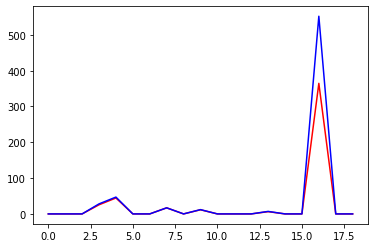

In [24]:
#testando
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(rf_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(rf_test_pred, y_test))
print('MSE:', mean_squared_error(rf_test_pred, y_test))



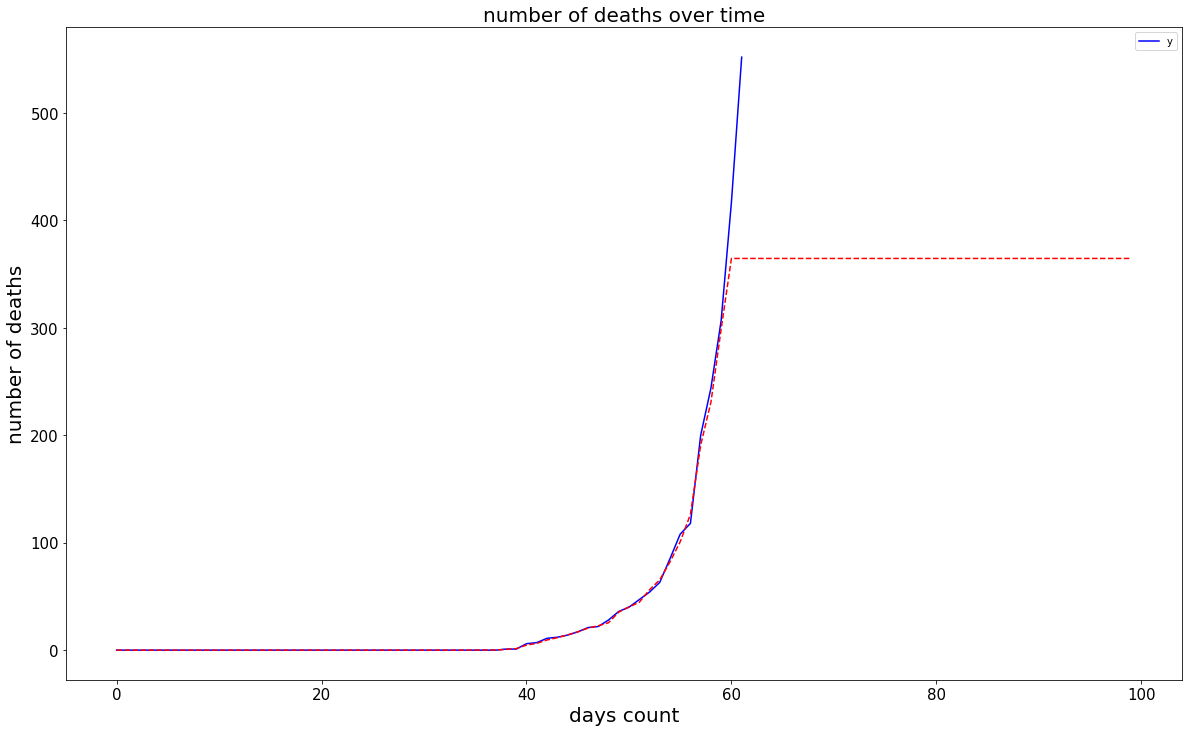

In [25]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, rf_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.legend('predict')
plt.ylabel('number of deaths', size = 20)
plt.legend('y')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# --------------------------------------------------------------------------------

# SVM REGRESSOR

In [26]:
data_model.head()

,Country,dayCount,Confirmed,Recovered,Deaths
0,US,0,1.0,0.0,0.0
1,US,1,1.0,0.0,0.0
2,US,2,2.0,0.0,0.0
3,US,3,2.0,0.0,0.0
4,US,4,5.0,0.0,0.0


In [27]:
X = data_model.iloc[:, 1].values
y = data_model.iloc[:, 4].values

In [28]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [29]:
y

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   1.,   6.,   7.,  11.,  12.,
        14.,  17.,  21.,  22.,  28.,  36.,  40.,  47.,  54.,  63.,  85.,
       108., 118., 200., 244., 307., 417., 552.])

In [30]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [32]:
#svm model
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'kernel' : kernel , 'C' : c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

previsor = SVR()

svm_search = RandomizedSearchCV(previsor, 
                                svm_grid,
                                scoring='neg_mean_squared_error',
                                cv=3, 
                                return_train_score=True,
                                n_jobs = -1, 
                                n_iter=40, 
                                verbose=1 )



In [36]:
svm_search.fit(X_train,  np.ravel(y_train,order='C'))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:  3.1min remaining:   11.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [37]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'C': 10}

In [38]:
svm_confirmed = svm_search.best_estimator_

In [39]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [40]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
svm_pred_future = svm_confirmed.predict(future)

In [42]:
svm_test_pred = svm_confirmed.predict(X_test)

In [43]:
svm_test_pred

array([41.89568339,  0.33768113, 75.42453411, -1.10431331, 18.11804788,
        2.85075812, -1.89017054,  6.73244058, -1.29036432, 12.28025137,
        4.22253717,  9.84215017, 34.17317846, -1.95046852, 15.03253684,
       -1.68666486, 57.08323736, 64.02464547,  8.73496822])

In [44]:
svm_pred_future

array([-1.97585714e+00, -1.97546045e+00, -1.97268357e+00, -1.96514632e+00,
       -1.95046852e+00, -1.92626999e+00, -1.89017054e+00, -1.83978999e+00,
       -1.77274816e+00, -1.68666486e+00, -1.57915991e+00, -1.44785313e+00,
       -1.29036432e+00, -1.10431331e+00, -8.87319929e-01, -6.37003974e-01,
       -3.50985274e-01, -2.68836274e-02,  3.37681132e-01,  7.45089187e-01,
        1.19772074e+00,  1.69795593e+00,  2.24817500e+00,  2.85075812e+00,
        3.50808542e+00,  4.22253717e+00,  4.99649349e+00,  5.83233453e+00,
        6.73244058e+00,  7.69919176e+00,  8.73496822e+00,  9.84215017e+00,
        1.10231178e+01,  1.22802514e+01,  1.36159310e+01,  1.50325368e+01,
        1.65324491e+01,  1.81180479e+01,  1.97917135e+01,  2.15558262e+01,
        2.34127660e+01,  2.53649129e+01,  2.74146474e+01,  2.95643500e+01,
        3.18164000e+01,  3.41731785e+01,  3.66370649e+01,  3.92104399e+01,
        4.18956834e+01,  4.46951761e+01,  4.76112973e+01,  5.06464278e+01,
        5.38029479e+01,  

In [45]:
scoreTreino = svm_confirmed.score(X_train, y_train)
scoreTeste = svm_confirmed.score(X_test, y_test)


In [46]:
scoreTreino

0.2765813946543336

In [47]:
scoreTeste

0.5109872617922047

MAE: 17.66367357551114
MSE: 1675.6448175555852


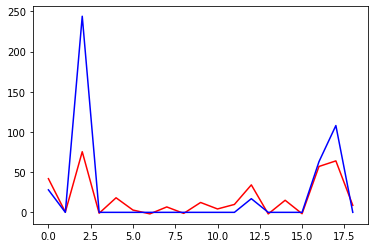

In [48]:
#  Y X PREVISOES
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(svm_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred, y_test))



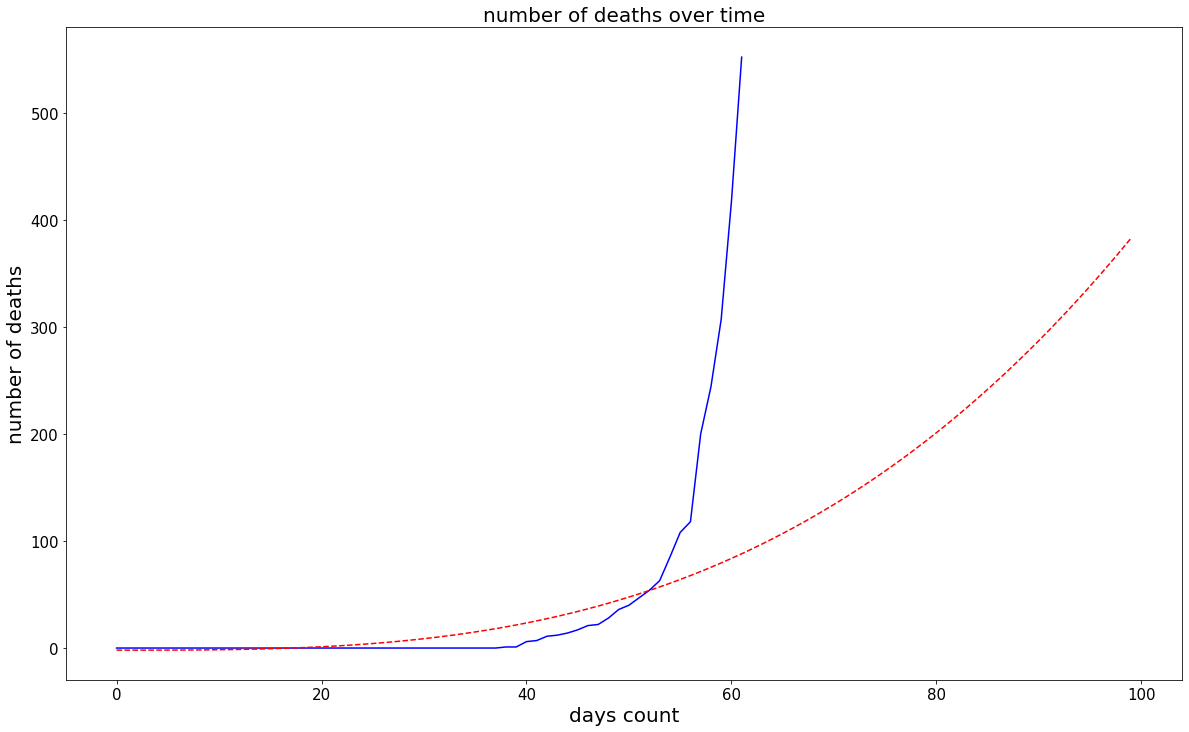

In [49]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, svm_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.ylabel('number of deaths', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()